In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)

## 1: Read the Data
- ### 1.1 Read current applicaiton:
    1. Read the Application Data csv file and store it in `curr_app`
    2. Check its shape and have a cursory look at the Data Frame (DF)

In [4]:
curr_app = pd.read_csv('application_data.csv')
print(curr_app.shape)
curr_app.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- ### 1.2 Read previous application:
    3. Read the data corresponding to Previous Application and store it in `prev_app`
    4. Here again, check the shape and have a cursory look at the DF

In [5]:
prev_app = pd.read_csv('previous_application.csv')
print(prev_app.shape)
prev_app.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ### 1.3 Inspect `curr_app`
    1. Inspect the different columns and their data types. It does not display all rows. So, split the DF into 2 different DFs to see `info()` about it
    2. Check the statistics of all the columns using `describe()`

In [6]:
ca = curr_app.iloc[:, 1:101]
ca1 = curr_app.iloc[:, 101:122]
print('Info about curr_app: The columns and their data types')
print('='*54)
print(ca.shape)
print(ca.info())
print(ca1.info())
print('Describe')
print('='*8)
curr_app.describe()

Info about curr_app: The columns and their data types
(307511, 100)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

- ### 1.4 Inspect `prev_app`
    1. Similarly, inspect the different columns and their data types.
    2. Check the statistics of all the columns using `describe()`

In [7]:
print('Info about prev_app: The columns and their data types')
print('='*54)
print(prev_app.info())
print('Describe')
print('='*8)
prev_app.describe()

Info about prev_app: The columns and their data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LO

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## 2.0 Data Cleaning
- ###     2.1 Inspect Null values in `curr_app`
    1. Inspect the number and percentage of null vaues in `curr_app`
    2. Display those columns that have more than 100 null values
    3. Display null-value percentage of all columns<br><br>
For the sake of readability, printing is done by bifurcating into columns that have > 50% and upto 50% null values.

In [8]:
null_cols_count_curr = curr_app.isnull().sum()
print('Current Application - null columns count')
print('='*40)
print(null_cols_count_curr[null_cols_count_curr > 100])
print()
null_cols_pct_curr = round((null_cols_count_curr*100/curr_app.shape[0]), 2)
print('Current Application - cols with > 50% null values')
print('='*50)
print(null_cols_pct_curr[null_cols_pct_curr > 50.0])
print()
print('Current Application - cols with < 50%, but > 0% null values')
print('='*60)
print(null_cols_pct_curr[(null_cols_pct_curr > 0.0) & (null_cols_pct_curr <= 50.0)])

Current Application - null columns count
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
EXT_SOURCE_1                  173378
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 64, dtype: int64

Current Application - cols with > 50% null values
OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18


- ###     2.2 Inspect Null values in `prev_app`
    1. Inspect the number and percentage of null vaues in `prev_app`
    2. Display those columns that have more than 100 null values
    3. Display null-value percentage of all columns<br><br>
Even here, for the sake of readability, printing is done by bifurcating into columns that have > 50% and upto 50% null values.

In [9]:
null_cols_count_prev = prev_app.isnull().sum()
print('Previous Application - null columns count')
print('='*40)
print(null_cols_count_prev[null_cols_count_prev > 100])
null_cols_pct_prev = round((null_cols_count_prev*100/prev_app.shape[0]), 2)
print('Previous Application - cols with > 50% null values')
print('='*50)
print(null_cols_pct_prev[null_cols_pct_prev > 50])
print()
print('Previous Application - cols with < 50%, but > 0% null values')
print('='*60)
print(null_cols_pct_prev[(null_cols_pct_prev > 0.0) & (null_cols_pct_prev <= 50.0)])

Previous Application - null columns count
AMT_ANNUITY                   372235
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64
Previous Application - cols with > 50% null values
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64

Previous Application - cols with < 50%, but > 0% null values
AMT_ANNUITY                  22.29
AMT_GOODS_PRICE              23.08
NAME_TYPE_SUITE              49.12
CNT_PAYMENT          

- ### 2.2 Drop Columns with high null percentage

    1. Since they don't give us the required amount of information, drop columns with Null percentage > 40, in both `curr_app` and `prev_app`
    2. After this, check the number of columns and the columns that are retained, in both `prev_app` and `curr_app`
    
    Handle **`curr_app`:**

In [10]:
curr_app = curr_app.drop(curr_app.loc[:, null_cols_pct_curr > 50].columns, axis = 1)
print(f'curr_app shape: {curr_app.shape}')
print()
print('Columns retained in curr_app')
print('='*28)
print(curr_app.columns)
curr_app.head()

curr_app shape: (307511, 81)

Columns retained in curr_app
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', '

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Handle **`prev_app`:**

In [11]:
prev_app = prev_app.drop(prev_app.loc[:, null_cols_pct_prev > 50].columns, axis = 1)
print(f'prev_app shape: {prev_app.shape}')
print()
print('Columns retained in prev_app')
print('='*29)
print(prev_app.columns)
prev_app.head()

prev_app shape: (1670214, 33)

Columns retained in prev_app
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ### 2.2 Current Null Cols Percentage

    - Find out the null columns percentage now, after dropping columns.<br>
    - **`curr_app`**

In [12]:
null_cols_count_curr1 = curr_app.isnull().sum()
print('Current Application - null columns count')
print('='*40)
print(null_cols_count_curr1[null_cols_count_curr1 > 100])
print()
null_cols_pct_curr1 = round((null_cols_count_curr1*100/curr_app.shape[0]), 2)
print('Current Application - null columns percentage')
print('='*45)
print(null_cols_pct_curr1[null_cols_pct_curr1 > 0.0])
print()
print(f'Number of columns in Current Application with non-zero null values: {len(null_cols_pct_curr1[null_cols_pct_curr1 > 0.0])}')

Current Application - null columns count
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OCCUPATION_TYPE                  96391
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
FLOORSMAX_AVG                   153020
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
dtype: int64

Current Application - null columns percentage
AM

- Find out the null columns percentage now, after dropping columns.<br>
- **`prev_app`**

In [13]:
null_cols_count_prev1 = prev_app.isnull().sum()
print('Previous Application - null columns count')
print('='*40)
print(null_cols_count_prev1[null_cols_count_prev1 > 100])
null_cols_pct_prev1 = round((null_cols_count_prev1*100/prev_app.shape[0]), 2)
print()
print('Previous Application - null columns percentage')
print('='*45)
print(null_cols_pct_prev1[null_cols_pct_prev1 > 0.0])
print()
print(f'Number of columns in Previous Application with non-zero null values: {len(null_cols_pct_prev1[null_cols_pct_prev1 > 0.0])}')

Previous Application - null columns count
AMT_ANNUITY                  372235
AMT_GOODS_PRICE              385515
NAME_TYPE_SUITE              820405
CNT_PAYMENT                  372230
PRODUCT_COMBINATION             346
DAYS_FIRST_DRAWING           673065
DAYS_FIRST_DUE               673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_LAST_DUE                673065
DAYS_TERMINATION             673065
NFLAG_INSURED_ON_APPROVAL    673065
dtype: int64

Previous Application - null columns percentage
AMT_ANNUITY                  22.29
AMT_GOODS_PRICE              23.08
NAME_TYPE_SUITE              49.12
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64

Number of columns in Previous Application with non-zero null values: 11


print(curr_app.columns)
curr_app.head()

- ### 2.3 Drop other unnecessary columns

    1. In `curr_app`, if we see the columns related to document type (**DOCUMENT_TYPE_num**), we find that these columns do not give any details
    2. It is impossible to decipher what they mean. So, we can drop these columns and reduce the dimensionality of the problem

In [14]:
list1 = []
str1 = ''
for i in range(2, 22):
    str1 = 'FLAG_DOCUMENT' + '_' + str(i)
    list1.append(str1)
print(curr_app.shape)
print(f'Dropping columns: {list1}')
curr_app = curr_app.drop(curr_app.ix[:, list1].columns, axis = 1)
print(curr_app.shape)

(307511, 81)
Dropping columns: ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
(307511, 61)


In [15]:
print('='*60)
print(null_cols_pct_curr[(null_cols_pct_curr > 0.0) & (null_cols_pct_curr <= 40.0)])

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
OCCUPATION_TYPE               31.35
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                  19.83
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64


- ### 2.4 Split DF on Target
    1. The DF needs to be analyzed based on the TARGET variable, that shows defaulters and non-defaulters
    2. So, first split the DF based on the TARGET variable
    3. Create 2 DFs, `curr_app_def` containing data about defaulters and `curr_app_non_def` containing data about non-defaulters

In [16]:
print(f'curr_app before splitting on TARGET: {curr_app.shape}')
curr_app_def = curr_app[curr_app.TARGET == 1]
print(f'curr_app after splitting on TARGET: {curr_app_def.shape}')
curr_app_def.head()

curr_app before splitting on TARGET: (307511, 61)
curr_app after splitting on TARGET: (24825, 61)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(f'curr_app before splitting on TARGET: {curr_app.shape}')
curr_app_nondef = curr_app[curr_app.TARGET == 0]
print(f'curr_app after splitting on TARGET: {curr_app_nondef.shape}')
curr_app_nondef.head()

curr_app before splitting on TARGET: (307511, 61)
curr_app after splitting on TARGET: (282686, 61)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0


- ### 2.5 Check the imbalance percentage
    1. It can be seen from the above, that there are 24,825 defaulters and 2,82,686 non-defaulters.
    2. Now, check the **Imbalance Percentage**, i.e., the percentage of people who have defaulted as against those that have not

In [18]:
# Imbalance Percentage

imbalance_pct_def = round(100*(curr_app.TARGET.value_counts(normalize = True)), 2)
print(imbalance_pct_def)

0    91.93
1     8.07
Name: TARGET, dtype: float64


From the imbalance percentage, it can be seen that there is a heavy imbalance towards **non-defaulters**.<br>
This is good for the bank, since most of the applicants are non-defaulters, which means, the bank has, so far not lost too much from its loans.

Let's now try to find the sum of Credit for defaulters and non-defaulters

In [19]:
# Sum of credit
credit_sum_def = curr_app_def.AMT_CREDIT.sum()
credit_sum_nondef = curr_app_nondef.AMT_CREDIT.sum()
print(f'Total amount of prospective default: {round(credit_sum_def/10000000, 2)} crores\nTotal amount of prospective recovery: {round(credit_sum_nondef/10000000, 2)}')
pct_amt_lost = round(100*(credit_sum_def/(credit_sum_def + credit_sum_nondef)), 2)
print(f'Percentage of loan amount lost: {pct_amt_lost}%')

Total amount of prospective default: 1384.69 crores
Total amount of prospective recovery: 17036.02
Percentage of loan amount lost: 7.52%


We can see that, even in the worst case of none of the defaulters paying any loan, the percentage of the loan amount lost is only **`7.52%`**, which is a fairly small number, compared to the amount that the bank recovers.

This is a good sign for the bank, in the sense that most of its customers are non-defaulters.<br>
Assuming some of the defaulters pay part of the loan and some part of the defaulted loan is recovered through collateral, the bank is not in a dire state.

In order to get a better picture of this, the following would help:

    1. collecting data about the amount of loan already paid by defaulters
    2. collecting data about the amount that can be recovered through collateral for the defaulters
    3. a hypothesis test to find out the probability of default (say, p(D))
    
This would enable the finding of the final amount that the bank could probably lose due to defaulters. It would, in all probability, be less than 7.52% of the total loan given and show that the bank is in a healthy state.

- ### 2.6 Check the relation between numeric variables for defaulters and non-defaulters
    1. Let's now check the behaviour of, and influencing factors behind the main numeric variables in the defaulters and non-defaulters dataset
    2. For this, we are first deleting all numeric columns that are not of much consequence in the correlation or that might act as confounders

In [20]:
curr_app_def = curr_app_def.drop(curr_app_def.ix[:, ['REGION_POPULATION_RELATIVE', 'FLAG_PHONE', 'HOUR_APPR_PROCESS_START']].columns, axis = 1)

In [21]:
curr_app_def['ENQUIRIES'] = curr_app_def['AMT_REQ_CREDIT_BUREAU_HOUR'] + curr_app_def['AMT_REQ_CREDIT_BUREAU_DAY'] \
                           + curr_app_def['AMT_REQ_CREDIT_BUREAU_WEEK'] + curr_app_def['AMT_REQ_CREDIT_BUREAU_MON'] \
                           + curr_app_def['AMT_REQ_CREDIT_BUREAU_QRT'] + curr_app_def['AMT_REQ_CREDIT_BUREAU_YEAR']

list1 = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', \
         'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
curr_app_def = curr_app_def.drop(curr_app_def.ix[:, list1].columns, axis = 1)

list1 = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', \
         'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
curr_app_def = curr_app_def.drop(curr_app_def.ix[:, list1].columns, axis = 1)

print(curr_app_def.dtypes[(curr_app_def.dtypes == np.int64) | (curr_app_def.dtypes == np.float64)].value_counts())

curr_app_def.dtypes[(curr_app_def.dtypes == np.int64) | (curr_app_def.dtypes == np.float64)]

float64    19
int64      15
dtype: int64


SK_ID_CURR                        int64
TARGET                            int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_EMAIL                        int64
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
REG_CITY_NOT_LIVE_CITY            int64
REG_CITY_NOT_WORK_CITY            int64
YEARS_BEGINEXPLUATATION_AVG     float64
FLOORSMAX_AVG                   float64
YEARS_BEGINEXPLUATATION_MODE    float64
FLOORSMAX_MODE                  float64


In [22]:
col_list = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
curr_app_def.ix[:, col_list] = curr_app_def.ix[:, col_list].abs()

curr_app_def['SK_ID_CURR'] = curr_app_def['SK_ID_CURR'].astype(str)

print(curr_app_def['TARGET'].isnull().sum())
curr_app_def1 = curr_app_def.drop(curr_app_def.ix[:, ['TARGET']].columns, axis = 1)

col_list1 = ['REGION_RATING_CLIENT_W_CITY', 'CNT_CHILDREN', 'OBS_60_CNT_SOCIAL_CIRCLE', \
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_BIRTH', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', \
             'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE']
curr_app_def1 = curr_app_def1.drop(curr_app_def1.ix[:, col_list1].columns, axis = 1)

curr_app_def1 = curr_app_def1.drop(curr_app_def1.ix[:, ['FLAG_EMP_PHONE']].columns, axis = 1)
curr_app_def1 = curr_app_def1.drop(curr_app_def1.ix[:, ['DAYS_LAST_PHONE_CHANGE', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ENQUIRIES']].columns, axis = 1)

print(curr_app_def1.columns)
print(len(curr_app_def1.columns))


0
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')
31


   - ## 3.1 Correlation: important numerical variables - defaulters

In [23]:
corr_def = curr_app_def1.corr()
corr_def = corr_def.where(np.triu(np.ones(corr_def.shape), k = 1).astype(np.bool))
corr_def1 = corr_def.unstack().reset_index()
corr_def1
corr_def1.columns = ['VAR1', 'VAR2', 'CORRELATION']
corr_def1.dropna(subset = ['CORRELATION'], inplace = True)
corr_def1.CORRELATION = round(corr_def1.CORRELATION, 2)
corr_def1.CORRELATION = corr_def1.CORRELATION.abs()
corr_def1
corr_def1.sort_values(by = 'CORRELATION', ascending = False, inplace = True)
#corr_def1 = corr_def1[corr_def1.CORRELATION]
print(corr_def1.shape)
#corr_def1.to_csv('Correlation.csv')
corr_def1.head(10)

(120, 3)


,VAR1,VAR2,CORRELATION
230,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
212,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
232,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
196,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
178,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
214,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
52,AMT_GOODS_PRICE,AMT_CREDIT,0.98
287,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
53,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
35,AMT_ANNUITY,AMT_CREDIT,0.75


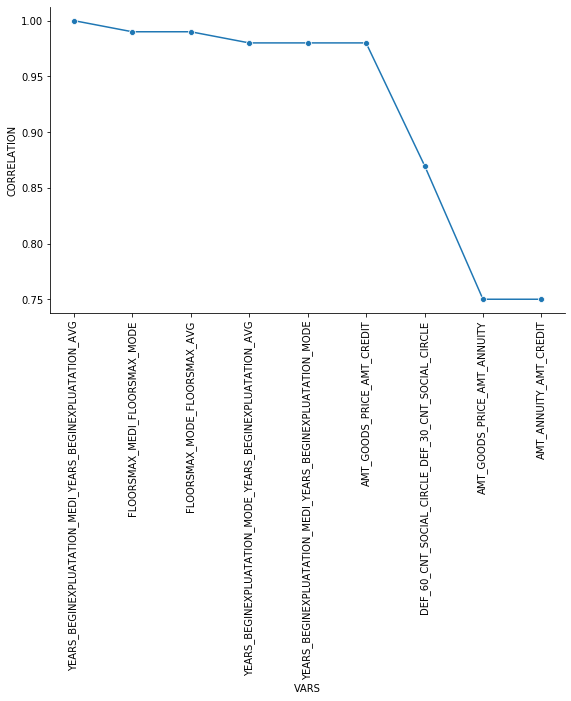

In [24]:
corr_def2 = corr_def1.sort_values(by = 'CORRELATION', ascending = False)
corr_def2 = corr_def2[1:10]
corr_def2['VARS'] = corr_def2['VAR1'] + '_' + corr_def2['VAR2']
f = sns.relplot(x = 'VARS', y = 'CORRELATION', aspect = 2.0, kind = 'line', sort = False, marker = 'o', data = corr_def2)
f.set_xticklabels(rotation = 90)
plt.show()

   - ### 3.1.1 Observations:
        1. Only the top 10 correlations plotted.
        2. Apart from the top 4, low correlation among other sets
        3. Top 4, is logical: AMT_GOODS_PRICE and AMT_CREDIT, AMT_ANNUITY and AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated since **goods price => loan => annuity**
        4. Another interesting correlation: DEF_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE. Means, consumers defaulting after 30 => defaulted after 60 DPD as well. Even though this is only for the social group, this gives an important, general inference. Defaulters have a tendency to continue defaulting for longer time durations => *financial problems*. So, refuse loans for such consumers
        5. Important **missing** correlation: **INCOME** and **CREDIT**. Ideally, should be highly correlated

- ## 3.2 Correlation: important numerical variables - non-defaulters

In [25]:
col_list = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
curr_app_nondef.ix[:, col_list] = curr_app_nondef.ix[:, col_list].abs()

curr_app_nondef['SK_ID_CURR'] = curr_app_nondef['SK_ID_CURR'].astype(str)
print(curr_app_nondef['TARGET'].isnull().sum())

curr_app_nondef1 = curr_app_nondef.drop(curr_app_nondef.ix[:, ['TARGET']].columns, axis = 1)

col_list1 = ['REGION_RATING_CLIENT_W_CITY', 'CNT_CHILDREN', 'OBS_60_CNT_SOCIAL_CIRCLE', \
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DAYS_BIRTH', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', \
             'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE']
curr_app_nondef1 = curr_app_nondef1.drop(curr_app_nondef1.ix[:, col_list1].columns, axis = 1)

curr_app_nondef1 = curr_app_nondef1.drop(curr_app_nondef1.ix[:, ['FLAG_EMP_PHONE']].columns, axis = 1)

curr_app_nondef1 = curr_app_nondef1.drop(curr_app_nondef1.ix[:, ['DAYS_LAST_PHONE_CHANGE', 'FLAG_EMAIL', 'FLAG_CONT_MOBILE']].columns, axis = 1)

print(curr_app_nondef1.columns)
print(len(curr_app_nondef1.columns))

0
Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_H

In [26]:
corr_nondef = curr_app_nondef1.corr()
corr_nondef = corr_nondef.where(np.triu(np.ones(corr_nondef.shape), k = 1).astype(np.bool))
corr_nondef1 = corr_nondef.unstack().reset_index()
corr_nondef1
corr_nondef1.columns = ['VAR1', 'VAR2', 'CORRELATION']
corr_nondef1.dropna(subset = ['CORRELATION'], inplace = True)
corr_nondef1.CORRELATION = round(corr_nondef1.CORRELATION, 2)
corr_nondef1.CORRELATION = corr_nondef1.CORRELATION.abs()
corr_nondef1.sort_values(by = 'CORRELATION', ascending = False, inplace = True)
#corr_nondef1 = corr_nondef1[corr_nondef1.CORRELATION >= 0.7]
print(corr_nondef1.shape)
#corr_nondef1.to_csv('Correlation_nondef.csv')
corr_nondef1[1:10]

(488, 3)


,VAR1,VAR2,CORRELATION
724,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
689,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
97,AMT_GOODS_PRICE,AMT_CREDIT,0.99
658,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
625,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
691,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
428,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
824,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
98,AMT_GOODS_PRICE,AMT_ANNUITY,0.78


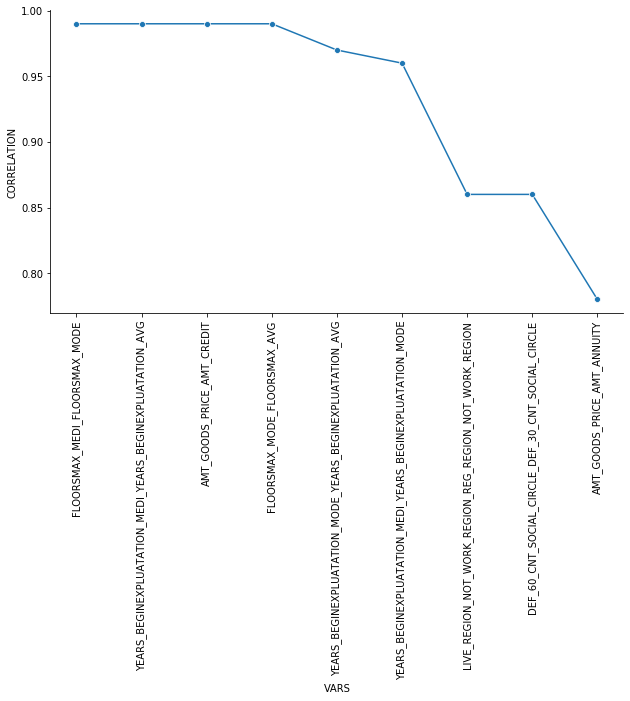

In [27]:
#corr_def2 = corr_def1.sort_values(by = 'CORRELATION', ascending = False)
corr_nondef2 = corr_nondef1[1:10]
corr_nondef2['VARS'] = corr_nondef2['VAR1'] + '_' + corr_nondef2['VAR2']
f = sns.relplot(x = 'VARS', y = 'CORRELATION', aspect = 2.0, kind = 'line', sort = False, marker = 'o', data = corr_nondef2)
f.set_xticklabels(rotation = 90)
plt.show()

   - ### 3.2.1 Observations:
       1. Again, only top 10 correlations plotted
       2. DPD 60 and DPD 30 are again correlated, but not of much import here
       3. As in defaulters' case, AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE are correlated - logical
       4. Good correlation between AMT_ANNUITY and AMT_INCOME => it indicates some healthy relation between customers' annual income and the annuity. This is an important metric that could help to some extent in ensuring that people don't default.

In [28]:
print(f'curr_app shape: {curr_app.shape}, prev_app shape: {prev_app.shape}')
df = prev_app.drop_duplicates(subset = 'SK_ID_CURR')
print(f'curr_app shape: {df.shape}, prev_app shape: {df.shape}')

curr_app shape: (307511, 61), prev_app shape: (1670214, 33)
curr_app shape: (338857, 33), prev_app shape: (338857, 33)


## 4.0 Combined Analysis
    1. Combine the 2 data frames, `curr_app` and `prev_app` and do an analysis of the combined DF
    2. Through this, insights can be gained on how parameters from previous applications of applicants, could help in analyzing applicants ability to repay loans
   - ### 4.1 Combine the 2 Data Frames

In [29]:
print(prev_app.columns)
print(prev_app.shape)
print(prev_app.dtypes)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')
(1670214, 33)
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION             

In [30]:
print(f'curr_app shape: {curr_app.shape}, prev_app shape: {prev_app.shape}')
fin_df = pd.merge(curr_app, prev_app, how = 'inner', on = 'SK_ID_CURR')
fin_df = fin_df.drop_duplicates(subset = 'SK_ID_CURR', keep = 'first', inplace = False)
print(fin_df.shape)
fin_df.head()

curr_app shape: (307511, 61), prev_app shape: (1670214, 33)
(291057, 93)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,2078043,Cash loans,24246.000,675000.0,675000.0,6

   - ### 4.2 Univariate Analysis
     - #### 4.2.1 NAME_CONTRACT_STATUS

Approved        0.754570
Canceled        0.120471
Refused         0.109765
Unused offer    0.015193
Name: NAME_CONTRACT_STATUS, dtype: float64

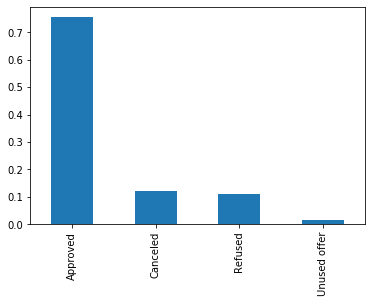

In [31]:
fin_df.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.bar()
fin_df.NAME_CONTRACT_STATUS.value_counts(normalize = True)

   - #### 4.2.2 Observations
           1. About 75% of loans, which means, most of the loan-applications, were approved the previous time
           2. Only 1.5% unused offers
           3. About 10% loans were refused, which needs to be looked into, further

   - #### 4.2.2 Credit Amount
       - Box Plots of Credit Amount of current loan (AMT_CREDIT_x) and the previous loan (AMT_CREDIT_y) done for **same customer**
       - Plots are done on log scale due to the values involved

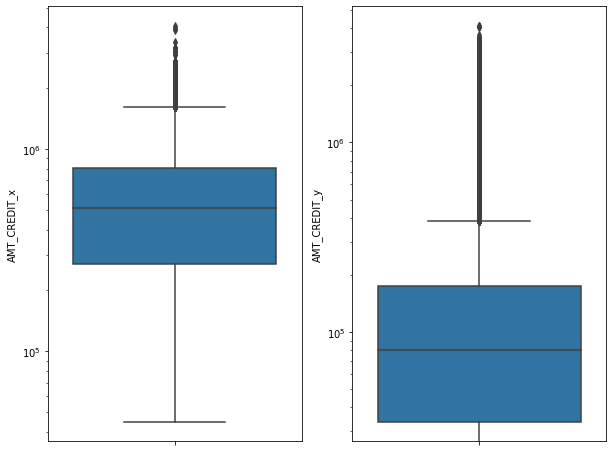

Current Loan amount median value: 508495.5
Previous Loan amount median value: 80739.0


In [32]:
plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
ax1 = sns.boxplot(y = 'AMT_CREDIT_x', data = fin_df)
ax1.set(yscale = 'log')
#plt.show()
plt.subplot(1,2,2)
ax2 = sns.boxplot(y = 'AMT_CREDIT_y', data = fin_df)
ax2.set(yscale = 'log')
plt.show()
print(f'Current Loan amount median value: {fin_df.AMT_CREDIT_x.median()}')
print(f'Previous Loan amount median value: {fin_df.AMT_CREDIT_y.median()}')

   - #### 4.2.3 Observations
       - It shows that median credit of current loan is significantly higher (about 5 lakhs) as compared to previous application (about 80,000). 
       - So, the losses could be higher in the current case, if loans are approved without proper analysis
       - Also there are multiple outliers, which means any analysis should consider median of the credit amounts
       
   - #### 4.2.4 NAME_CLIENT_TYPE
       - In the combined dataframe, analyze the type of clients that apply for loan
       - How many of the previous loan applications have been from repeaters, how many are new, especially

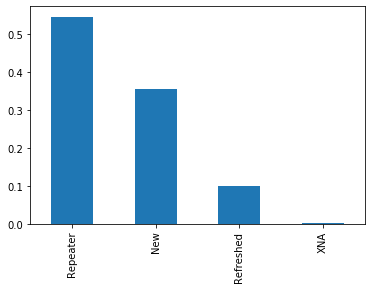

Repeater     0.545196
New          0.353663
Refreshed    0.100276
XNA          0.000866
Name: NAME_CLIENT_TYPE, dtype: float64

In [34]:
fin_df.NAME_CLIENT_TYPE.value_counts(normalize = True).plot.bar()
f.set_xticklabels(rotation = 90)
plt.show()

fin_df.NAME_CLIENT_TYPE.value_counts(normalize = True)

   - #### 4.2.5 Observations
   We can get the following information from this:
       1. The majority of loan applicants are generally, repeaters
       2. Repeaters and new applicants from about 80% of the total applicants
       3. Since there are very few NAs, we have covered most of the applicants for the previous loan

  - #### 4.2.6 AMT_CREDIT
      - Let's examine the credit amount of previous loan and the current loan

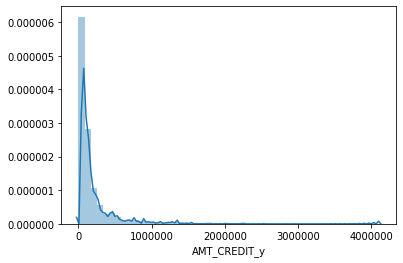

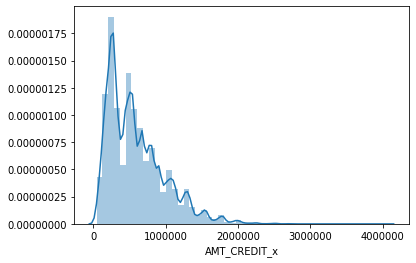

In [35]:
sns.distplot(fin_df.AMT_CREDIT_y)
plt.show()
sns.distplot(fin_df.AMT_CREDIT_x)
plt.show()

   - #### 4.2.7 Observations
        - In both the cases, i.e., previous and current, the number of applications reduces exponential with increase in Credit amount
        - However, the previous applications taper off very quickly and there are hardly any applications above 10 lakhs
        - But in the current case, there are some applications even at 20 laks
        - Further, there are a lot more applications at every cost-point

- ### 4.3 Bivariate analysis of merged DF
    1. Check the effect of the status of previous application on the Target variable in the current case
    2. See if the fact that the loan was *Approved, Canceled, Refused* or *Unused*, has an effect on the propensity of customers to default

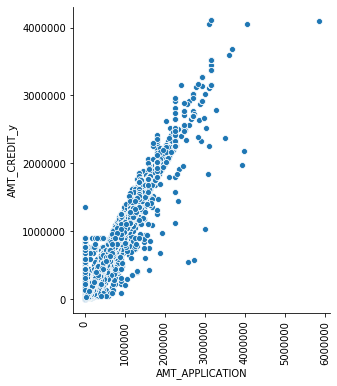

In [36]:
f = sns.relplot(x = 'AMT_APPLICATION', y = 'AMT_CREDIT_y', data = fin_df)
f.set_xticklabels(rotation = 90)
plt.show()

NAME_CLIENT_TYPE  NAME_CONTRACT_STATUS
New               Approved                0.961306
                  Refused                 0.026541
                  Canceled                0.007578
                  Unused offer            0.004576
Refreshed         Approved                0.784143
                  Canceled                0.109196
                  Refused                 0.078120
                  Unused offer            0.028541
Repeater          Approved                0.615592
                  Canceled                0.195238
                  Refused                 0.169564
                  Unused offer            0.019605
XNA               Canceled                0.460317
                  Approved                0.396825
                  Refused                 0.115079
                  Unused offer            0.027778
Name: NAME_CONTRACT_STATUS, dtype: float64

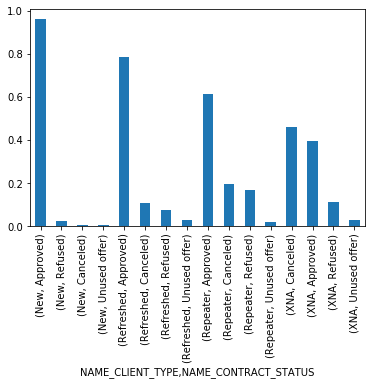

In [37]:
fin_df.groupby(['NAME_CLIENT_TYPE'])['NAME_CONTRACT_STATUS'].value_counts(normalize = True).plot.bar()
fin_df.groupby(['NAME_CLIENT_TYPE'])['NAME_CONTRACT_STATUS'].value_counts(normalize = True)

   - #### 4.3.1 NAME_CLIENT_TYPE vs TARGET
       - It might be interesting to analyze the client type (Repeater, New, etc.) of the previous application with TARGET
       - The logic is that, all the applicants in the merged frame are those that were there even in the previous application, since it is an INNER JOIN with all the duplicates removed
       - Due to this, we can get an idea of how repeaters of the previous application, who have applied now, have behaved in the past, giving an idea of how to handle repeated loan applications

NAME_CLIENT_TYPE
New          0.379031
Refreshed    0.081359
Repeater     0.538729
XNA          0.000881
Name: TARGET, dtype: float64


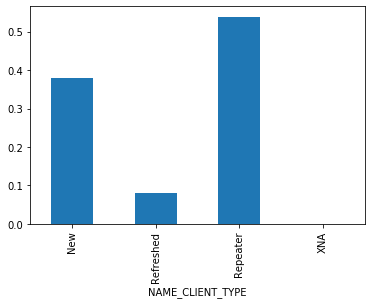

In [39]:
(fin_df.groupby(['NAME_CLIENT_TYPE'])['TARGET'].sum()/fin_df.TARGET.sum()).plot.bar()
print(fin_df.groupby(['NAME_CLIENT_TYPE'])['TARGET'].sum()/fin_df.TARGET.sum())

   - #### 4.3.2 Observations
       1. It is interesting to note that the maximum percentage of people among the defaulters, are the repeaters.
       2. In this particular plot, the **New** category corresponds to *New* for the previous application. So, they would be repeaters for the current application.
       3. So, if these 2 are added, the total defaulter turn out to be about 90%!

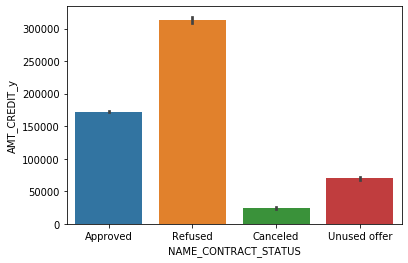

,mean,median
NAME_CONTRACT_STATUS,,
Approved,172174.044590,92065.5
Canceled,24119.497305,0.0
Refused,313494.492990,147028.5
Unused offer,69755.108080,59350.5


In [40]:
sns.barplot(data = fin_df, x = 'NAME_CONTRACT_STATUS', y = 'AMT_CREDIT_y')
plt.show()
fin_df.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT_y'].aggregate(['mean', 'median'])


 - #### 4.3.3 Effect of loan approval decision (NAME_CONTRACT_STATUS) on TARGET    

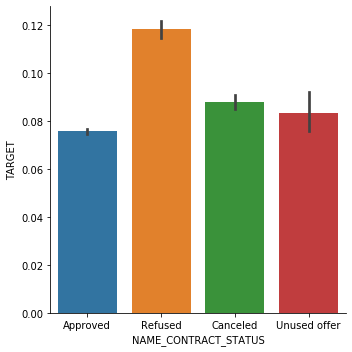

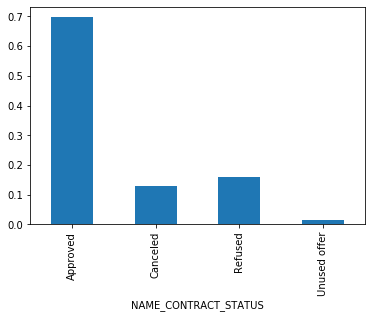

In [41]:
f = sns.catplot(x = 'NAME_CONTRACT_STATUS', y = 'TARGET', kind = 'bar', data = fin_df)
plt.show()
fin_df.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].mean()

((fin_df.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].sum()/fin_df.TARGET.sum())).plot.bar()
plt.show()


   - #### 4.3.4 Observations 1: 
        1. We can see that, in general, the status of the previous application, helps in getting useful information about defaulters
        2. Specifically, those whose loans have been *Refused* form the highest percentage of defaulters, i.e., **12%**
        3. Further, the group of customers whose loans were either **Refused** or **Canceled** in the previous application, form the highest percentage (**21%**) of defaulters
        4. Also, consumers whose loans were **Approved** the last time, have the least percentage of defaulters
        
       So, it can be safely concluded that, the contract status of the prevous loan applcation is a good metric to use, to analyze whether an applicant would be a defaulter
    - **Observations 2:**
            1. The second plot above, is a plot of the Defaulters only as a function of NAME_CONTRACT_STATUS. It does not consider non-defaulters at all.
            2. Here, we see that the highest no. of defaulters in a particular set of NAME_CONTRACT_STATUS, is that of Approved customers in the previous application.
            3. However, we saw in the previous case, that the higest is the customers who were in Refused category
            
      **This means that** among the Approved customers, even though the no. of defaulters are high, the number of people who have correctly paid their loans is also high. That is the reason for the % of Approved customers being lower, when both Defaulters and non-defaulters is considered 

   - #### 4.3.5 Defaulters based on Gender

CODE_GENDER  TARGET
F            0         179121
             1          13644
M            0          88087
             1          10201
XNA          0              4
Name: TARGET, dtype: int64


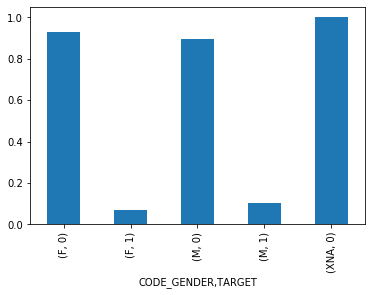

In [43]:
print(fin_df.groupby(['CODE_GENDER'])['TARGET'].value_counts())
(fin_df.groupby(['CODE_GENDER'])['TARGET'].value_counts(normalize = True)).plot.bar()
plt.show()

  - #### 4.3.6 Observations
      1. It is clear that the percentage of defaulters is higher among female applicants. Of the 23845 defaulters, about `13644` are Female applicants and about `10201` are Male applicants. 
      2. So, it can be said that female applicants should be scrutinized further, for other contributing factors, before approving their loan.

   - #### 4.3.7 Defaulters based on type of loan
   We now check for the percentage of defaulters based on the type of loan

   - #### 4.3.8 Education vs AMT_CREDIT and Education vs Contract Type
       - Check whether there is any relation between education and Credit amount in the prvious application
       - Check whether there is any relation between education and Contract Status

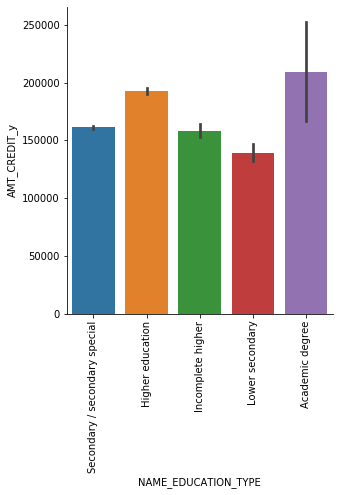

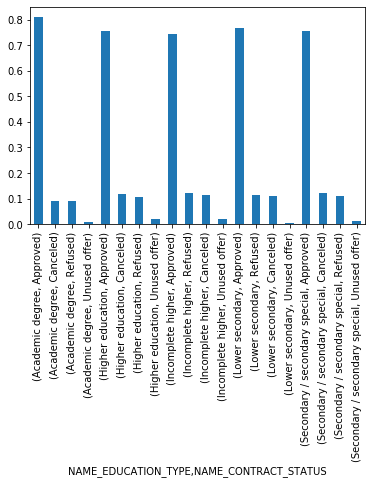

In [46]:
f = sns.catplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT_y', kind = 'bar', data = fin_df)
f.set_xticklabels(rotation = 90)
plt.show()

(fin_df.groupby(['NAME_EDUCATION_TYPE'])['NAME_CONTRACT_STATUS'].value_counts(normalize = True)).plot.bar()
f.set_xticklabels(rotation = 90)
plt.show()

   - #### 4.3.9 Observations:
   
       (A) EDUCATION_TYPE and AMT_CREDIT
           1. It appears the amount of Credit approved in the previous application is higher for customers with higher education (Higher Education and Academic Degree)
           2. Further, the trend is that the approved loan reduces for as the education level reduces
           3. However, no drastic difference is seen
           
       (B) EDUCATION_TYPE and NAME_CONTRACT_STATUS:
           1. This was mainly an attempt to see, for each type of education, if there is any specific difference in the Approval of loans. 
           2. It was mainly intended to drill-down further on the effect Education has on the Approval process.
           3. However, no marked difference is seen in either Approval or Refusal except for whatever was observed in Amount of Credit. A similar trend of slightly higher Approval is seen

## 5.0 Conclusion

   1. Correlation of numeric columns among non-defaulters shows that correlation between AMT_ANNUITY and AMT_INCOME is good => healthy relation between customers' annual income and the annuity. There is no correlation between these 2 parameters among defaulters. This is an important metric that could help to some extent in ensuring that people don't default. 
   2. Median credit of current loan is significantly higher (about 5 lakhs) as compared to previous application (about 80,000)
   3.	If all applicants are considered, applicants whose loans were refused in the previous application, happen to be the majority of defaulters
   4.	However, if only defaulters are considered, highest no. of defaulters in a particular set of NAME_CONTRACT_STATUS, is that of Approved customers in the previous application. This means that among the Approved customers, even though the no. of defaulters are high, the number of people who have correctly paid their loans is also high.
